<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispoalim = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aidealim = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sousnutri = pd.read_csv('sous_nutrition.csv')

# Charger les données à partir du fichier CSV qui nous aideras plus tard
# au calcul théorique de personnes qui peuvent être nourries
dfbe = pd.read_csv('Besoin _energetique_moyen.csv')

fichiers = ['population.csv','dispo_alimentaire.csv','aide_alimentaire.csv','sous_nutrition.csv','Besoin _energetique_moyen.csv']
for fichiers in fichiers:
    df = pd.read_csv(fichiers)
    print(f"Aperçu de {fichiers}:")
    display(df.head())  # Affiche les 5 premières lignes du DataFrame
    print("\n")


Aperçu de population.csv:


,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113




Aperçu de dispo_alimentaire.csv:


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN




Aperçu de aide_alimentaire.csv:


,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504




Aperçu de sous_nutrition.csv:


,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5




Aperçu de Besoin _energetique_moyen.csv:


,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6128,Valeur,21057,Besoins énergétiques alimentaires moyens (kcal...,2017,2017,kcal/personne/jour,2105,E,Valeur estimée,NaN
1,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6128,Valeur,21057,Besoins énergétiques alimentaires moyens (kcal...,2017,2017,kcal/personne/jour,2357,E,Valeur estimée,NaN
2,FS,Données de la sécurité alimentaire,8,Albanie,6128,Valeur,21057,Besoins énergétiques alimentaires moyens (kcal...,2017,2017,kcal/personne/jour,2488,E,Valeur estimée,NaN
3,FS,Données de la sécurité alimentaire,12,Algérie,6128,Valeur,21057,Besoins énergétiques alimentaires moyens (kcal...,2017,2017,kcal/personne/jour,2294,E,Valeur estimée,NaN
4,FS,Données de la sécurité alimentaire,276,Allemagne,6128,Valeur,21057,Besoins énergétiques alimentaires moyens (kcal...,2017,2017,kcal/personne/jour,2545,E,Valeur estimée,NaN


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [4]:
#Consulter le nombre de colonnes
print("Le DataFrame comporte {} colonne(s)".format(population.shape[1]))
#La nature des données dans chacune des colonnes
print("\nType de données pour chaque colonne:")
print(population.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
print("\nNombre de valeurs présentes dans chaque colonne:")
print(population.count())

Le DataFrame comporte 3 colonne(s)

Type de données pour chaque colonne:
Zone       object
Année       int64
Valeur    float64
dtype: object

Nombre de valeurs présentes dans chaque colonne:
Zone      1416
Année     1416
Valeur    1416
dtype: int64


In [5]:
#Affichage les 5 premières lignes de la table
print("5 premières lignes du tableau population:")
display (population.head())

5 premières lignes du tableau population:


,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [6]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000

# Trouver la valeur maximale dans la colonne 'Valeur'
max_value = population['Valeur'].max()

# Si la valeur maximale a une partie décimale, multiplier toutes les valeurs par 1000
if max_value != int(max_value):
    print("'Valeur' du tableau multiplié par 1000")
    population['Valeur'] = (population['Valeur'] * 1000).astype(int)
else:
    print("Les valeurs ont déjà été multipliées par 1000.")
display(population)

'Valeur' du tableau multiplié par 1000


,Zone,Année,Valeur
0,Afghanistan,2013,32269589
1,Afghanistan,2014,33370794
2,Afghanistan,2015,34413603
3,Afghanistan,2016,35383032
4,Afghanistan,2017,36296113
...,...,...,...
1411,Zimbabwe,2014,13586707
1412,Zimbabwe,2015,13814629
1413,Zimbabwe,2016,14030331
1414,Zimbabwe,2017,14236595


In [7]:
#changement du nom de la colonne Valeur par Population
population = population.rename(columns={'Valeur': 'Population'})

In [8]:
#Affichage les 5 premières lignes de la table pour voir les modifications
display((population).head())

,Zone,Année,Population
0,Afghanistan,2013,32269589
1,Afghanistan,2014,33370794
2,Afghanistan,2015,34413603
3,Afghanistan,2016,35383032
4,Afghanistan,2017,36296113


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [9]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(dispoalim.shape[0]))
print("Le tableau comporte {} colonne(s)".format(dispoalim.shape[1]))

Le tableau comporte 15605 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


In [10]:
#Consulter le nombre de colonnes
print("Le DataFrame comporte {} colonne(s)".format(dispoalim.shape[1]))
#La nature des données dans chacune des colonnes
print("\nType de données pour chaque colonne:")
print(dispoalim.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
print("\nNombre de valeurs présentes dans chaque colonne:")
print(dispoalim.count())

Le DataFrame comporte 18 colonne(s)

Type de données pour chaque colonne:
Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                        

In [11]:
#Affichage les 5 premières lignes de la table
display (dispoalim.head())

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [12]:
#remplacement des NaN dans le dataset par des 0
dispoalim = dispoalim.fillna(0)
display (dispoalim.head())

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
# Copiez les données de dispoalim à dispoalim2
dispoalim2 = dispoalim.copy()
# Sélectionnez les colonnes 4 et 5 et multipliez-les par 1000 deux fois
dispoalim2.iloc[:, [3, 4]] = dispoalim2.iloc[:, [3, 4]] * 1000 * 1000
# Sélectionnez les 9 dernières colonnes et multipliez-les par 1000 deux fois
dispoalim2.iloc[:, -9:] = dispoalim2.iloc[:, -9:] * 1000 * 1000
# Affichez dispoalim2
display(dispoalim2)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3000000.0,0.0,0.0,3000000.0,0.0,2000000.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#Affichage les 5 premières lignes de la table
display (dispoalim2.head())

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [15]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(aidealim.shape[0]))
print("Le tableau comporte {} colonne(s)".format(aidealim.shape[1]))

Le tableau comporte 1475 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [16]:
#Consulter le nombre de colonnes
print("Le DataFrame comporte {} colonne(s)".format(aidealim.shape[1]))

Le DataFrame comporte 4 colonne(s)


In [17]:
#Affichage les 5 premières lignes de la table
display (aidealim.head())

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [18]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aidealim = aidealim.rename(columns={'Pays bénéficiaire': 'Zone'})
display(aidealim.head())

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [19]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
# Copiez les données de dispoalim à dispoalim2
aidealim2 = aidealim.copy()
# Sélectionnez les 9 dernières colonnes et multipliez-les par 1000 deux fois
aidealim2.iloc[:, -1:] = aidealim.iloc[:, -1:] * 1000 *1000
# Affichez dispoalim2
display(aidealim2)

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000000
1,Afghanistan,2014,Autres non-céréales,335000000
2,Afghanistan,2013,Blé et Farin,39224000000
3,Afghanistan,2014,Blé et Farin,15160000000
4,Afghanistan,2013,Céréales,40504000000
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96000000
1471,Zimbabwe,2013,Non-céréales,5022000000
1472,Zimbabwe,2014,Non-céréales,2310000000
1473,Zimbabwe,2015,Non-céréales,306000000


In [20]:
#Affichage les 5 premières lignes de la table
display(aidealim2.head())

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000000
1,Afghanistan,2014,Autres non-céréales,335000000
2,Afghanistan,2013,Blé et Farin,39224000000
3,Afghanistan,2014,Blé et Farin,15160000000
4,Afghanistan,2013,Céréales,40504000000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [21]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(sousnutri.shape[0]))
print("Le tableau comporte {} colonne(s)".format(sousnutri.shape[1]))

Le tableau comporte 1218 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [22]:
#Consulter le nombre de colonnes
print("Le DataFrame comporte {} colonne(s)".format(sousnutri.shape[1]))

Le DataFrame comporte 3 colonne(s)


In [23]:
#Afficher les 5 premières lignes de la table
display (sousnutri.head())

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [24]:
#Conversion de la colonne sous nutrition en numérique
sousnutri['Valeur'] = pd.to_numeric(sousnutri['Valeur'], errors='coerce')

In [25]:
#Conversion de la colonne
#(avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
# Supprimez les lignes avec NaN dans la colonne 'Valeur'
sousnutri = sousnutri.dropna(subset=['Valeur'])

In [26]:
#changement du nom de la colonne Valeur par sous_nutrition
sousnutri = sousnutri.rename(columns={'Valeur': 'sous_nutrition'})
display(sousnutri.head())

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [27]:
# Copiez les données de sousnutri à sousnutri2
sousnutri2 = sousnutri.copy()
# Sélectionnez la colonne et multiplier par 1000 deux fois
sousnutri2.iloc[:, -1:] = sousnutri.iloc[:, -1:] * 1000000 

In [28]:
#Afficher les 5 premières lignes de la table
display (sousnutri2.head())

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [29]:
# Filtrer sousnutri2 pour les années 2016-2018
sousnutri2tri = sousnutri2[sousnutri2['Année'].str.contains('2016-2018')]
# Filtrer population pour l'année 2017
population_tri = population[population['Année'] == 2017]
# Faire une jointure entre sousnutri2tri et population_tri en se basant sur les zones
# Cela va créer un nouveau dataframe sans modifier population
popsousnutri2017 = pd.merge(sousnutri2tri, population_tri, on='Zone', how='outer')

In [30]:
#Affichage du dataset
display (popsousnutri2017.head())

,Zone,Année_x,sous_nutrition,Année_y,Population
0,Afghanistan,2016-2018,10500000.0,2017,36296113
1,Afrique du Sud,2016-2018,3100000.0,2017,57009756
2,Albanie,2016-2018,100000.0,2017,2884169
3,Algérie,2016-2018,1300000.0,2017,41389189
4,Angola,2016-2018,5800000.0,2017,29816766


In [31]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
pourcentage2017 = (popsousnutri2017['sous_nutrition'].sum() / popsousnutri2017['Population'].sum()) * 100
print('En 2017, '+str(round(pourcentage2017,0))+'% de la population était en état de sous nutrition')
# Calculer le total de sous-nutrition pour ces années
total_sous_nutrition_2016_2018 = sousnutri2tri['sous_nutrition'].sum()
print(f"Le total de sous-nutrition pour les années 2016 à 2018 est : {total_sous_nutrition_2016_2018:.0f}")
print((popsousnutri2017['Population'].sum()))

En 2017, 7.0% de la population était en état de sous nutrition
Le total de sous-nutrition pour les années 2016 à 2018 est : 535700000
7548134097


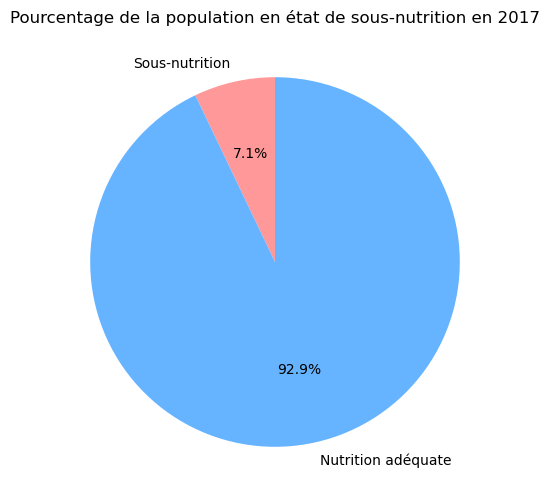

In [32]:
# Création du graphique
plt.figure(figsize=(6, 6))
plt.pie([pourcentage2017, 100-pourcentage2017], labels=['Sous-nutrition', 'Nutrition adéquate'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Pourcentage de la population en état de sous-nutrition en 2017')
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [33]:
#Combien mange en moyenne un être humain ?
print("Combien mange en moyenne un être humain ? Plusieurs valeurs et sources peuvent donner une estimation. "
      "Si l'on reprend la source de nos données base de données FAOSTAT 'https://www.fao.org/faostat/fr/#data' on peut retrouver "
      "les besoin energetiques moyen par pays, par exemple pour l'année 2017. Besoin _energetique_moyen.csv. "
      "On peut donc l'importer et calculer la moyenne.")

# Calculer la moyenne de la colonne 'besoinenerg'
moyenne_besoin_enenerg = round(dfbe['Valeur'].mean())
# Afficher la moyenne
print(f"La moyenne des besoins énergétiques environs de {moyenne_besoin_enenerg} kcal par jour.")

Combien mange en moyenne un être humain ? Plusieurs valeurs et sources peuvent donner une estimation. Si l'on reprend la source de nos données base de données FAOSTAT 'https://www.fao.org/faostat/fr/#data' on peut retrouver les besoin energetiques moyen par pays, par exemple pour l'année 2017. Besoin _energetique_moyen.csv. On peut donc l'importer et calculer la moyenne.
La moyenne des besoins énergétiques environs de 2360 kcal par jour.


In [34]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
# Créez une copie de 'population'
populationtri = population.copy()
# Triez le dataframe 'populationtri' par 'Année'
populationtri = populationtri.sort_values('Année')
# Supprimez les doublons et ne gardez que la dernière entrée pour chaque 'Zone'
populationtri = populationtri.drop_duplicates(subset='Zone', keep='last')
# Ensuite, vous pouvez fusionner les deux dataframes
dispoalimpop = pd.merge(dispoalim2, populationtri[['Zone', 'Population']], on='Zone', how='left')

In [35]:
#Affichage du nouveau dataframe
display(dispoalimpop)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,37171921.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,37171921.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,37171921.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37171921.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,37171921.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3000000.0,0.0,0.0,3000000.0,0.0,2000000.0,0.0,0.0,0.0,652857.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,652857.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,652857.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,652857.0


In [36]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
# Créez une copie de 'dispoalimpop' pour 'dispoalimpop2'
dispoalimpop2 = dispoalimpop.copy()
# Calculez 'dispo_kcal' et remplacez la colonne 'Disponibilité alimentaire (Kcal/personne/jour)'
dispoalimpop2['dispo_kcal'] = dispoalimpop2['Disponibilité alimentaire (Kcal/personne/jour)'] * dispoalimpop2['Population']
# Supprimez la colonne 'Disponibilité alimentaire (Kcal/personne/jour)'
dispoalimpop2.drop('Disponibilité alimentaire (Kcal/personne/jour)', axis=1, inplace=True)
display(dispoalimpop2)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population,dispo_kcal
0,Afghanistan,Abats Comestible,animale,0.0,0.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,37171921.0,185859605.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,37171921.0,37171921.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,37171921.0,37171921.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37171921.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,37171921.0,148687684.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,4.70,4.28,1.41,3000000.0,0.0,0.0,3000000.0,0.0,2000000.0,0.0,0.0,0.0,652857.0,29378565.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,3.34,0.69,1.14,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,652857.0,7181427.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,652857.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,652857.0,0.0


In [37]:
#Calcul du nombre d'humains pouvant être nourris
# Créez une copie de 'dispoalimpop2' pour 'dispoalimpop3'
dispoalimpop3 = dispoalimpop2[['Zone', 'Population', 'dispo_kcal']].copy()
# Calculez le nombre d'humains qui peuvent être nourris
dispoalimpop3['humains_nourissable'] = dispoalimpop3['dispo_kcal'] / 2360
# Groupez 'dispoalimpop3' par 'Zone' et calculez la somme de 'dispo_kcal' et 'nb_humains'
grouped = dispoalimpop3.groupby('Zone').agg({'Population':'first', 'dispo_kcal':'sum', 'humains_nourissable':'sum'}).reset_index()
# Formatez les chiffres pour qu'ils soient plus lisibles
pd.options.display.float_format = '{:.2f}'.format
# Affichez le dataframe groupé
display(grouped)
# Calculez le nombre total d'humains qui peuvent être nourris et arrondissez à l'entier le plus proche
total_humains = round(grouped['humains_nourissable'].sum())
print("Nombre total d'humains qui peuvent être nourris :", total_humains)

,Zone,Population,dispo_kcal,humains_nourissable
0,Afghanistan,37171921.00,77577799127.00,32871948.78
1,Afrique du Sud,57792518.00,174533404360.00,73954832.36
2,Albanie,2882740.00,9190175120.00,3894142.00
3,Algérie,42228408.00,139058147544.00,58922943.87
4,Allemagne,83124418.00,291184836254.00,123383405.19
...,...,...,...,...
169,Émirats arabes unis,9630959.00,31541390725.00,13364996.07
170,Équateur,17084358.00,40079903868.00,16983010.11
171,États-Unis d'Amérique,327096265.00,1204368447730.00,510325613.44
172,Éthiopie,109224414.00,232538777406.00,98533380.26


Nombre total d'humains qui peuvent être nourris : 8954163948


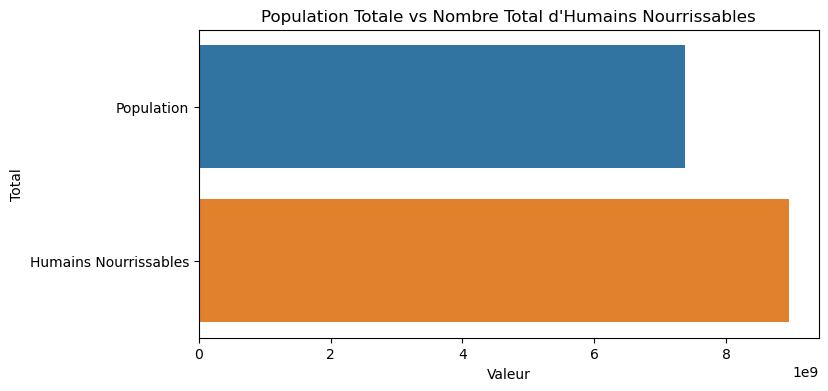

In [38]:
# Calculer la somme totale de la population et du nombre d'humains nourrissables
total_population = grouped['Population'].sum()
total_humains_nourissable = grouped['humains_nourissable'].sum()
# Créer un DataFrame avec ces informations
data = pd.DataFrame({'Total': ['Population', 'Humains Nourrissables'], 'Valeur': [total_population, total_humains_nourissable]})
# Créer un graphique à barres horizontales
plt.figure(figsize=(8, 4))
sns.barplot(x='Valeur', y='Total', data=data)
plt.title('Population Totale vs Nombre Total d\'Humains Nourrissables')
plt.show()

<div style=“border: 1px solid RGB(0,150,250);” > <h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">Par curiosité, je regarde la France</h4> </div>

In [39]:
france = grouped[grouped['Zone'] == 'France']
# Affichez les lignes sélectionnées
display(france)
print(f"On peut nourrir {france['humains_nourissable'].values[0]:.2f} de personnes pour {france['Population'].values[0]:.2f} d'habitants environ.")

,Zone,Population,dispo_kcal,humains_nourissable
53,France,64990511.00,226296959302.00,95888542.08


On peut nourrir 95888542.08 de personnes pour 64990511.00 d'habitants environ.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [40]:
#Transfert des données avec les végétaux dans un nouveau dataframe
# Sélectionnez les lignes où 'Origine' est égale à 'végétale'
dispoalimveget = dispoalimpop2[dispoalimpop2['Origine'] == 'vegetale']
# Affichez le nouveau dataframe
display(dispoalimveget)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population,dispo_kcal
1,Afghanistan,"Agrumes, Autres",vegetale,0.00,0.00,1.29,0.01,0.02,41000000.00,2000000.00,40000000.00,39000000.00,2000000.00,3000000.00,0.00,0.00,0.00,37171921.00,37171921.00
2,Afghanistan,Aliments pour enfants,vegetale,0.00,0.00,0.06,0.01,0.03,2000000.00,0.00,2000000.00,2000000.00,0.00,0.00,0.00,0.00,0.00,37171921.00,37171921.00
3,Afghanistan,Ananas,vegetale,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,37171921.00,0.00
4,Afghanistan,Bananes,vegetale,0.00,0.00,2.70,0.02,0.05,82000000.00,0.00,82000000.00,82000000.00,0.00,0.00,0.00,0.00,0.00,37171921.00,148687684.00
6,Afghanistan,Bière,vegetale,0.00,0.00,0.09,0.00,0.00,3000000.00,0.00,3000000.00,3000000.00,0.00,0.00,0.00,0.00,0.00,37171921.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15595,Îles Salomon,Sésame,vegetale,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,652857.00,0.00
15596,Îles Salomon,Thé,vegetale,0.00,0.00,0.17,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,652857.00,0.00
15597,Îles Salomon,Tomates,vegetale,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,652857.00,0.00
15603,Îles Salomon,Vin,vegetale,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,652857.00,0.00


In [41]:
#Calcul du nombre de kcal disponible pour les végétaux
# tout comme précédement, on peut grouper par zone
# et calculer ajouter la colonne d'humains nourissable
dispoalimveget = dispoalimveget[['Zone', 'Population', 'dispo_kcal']].copy()
# Calculez 'humains_nourissable_vegetaux'
dispoalimveget['humains_nourissable_vegetaux'] = dispoalimveget['dispo_kcal'] / 2360
# Groupez 'dispoalimveget' par 'Zone' et calculez la somme de 'dispo_kcal' et 'humains_nourissable_vegetaux'
grouped2 = dispoalimveget.groupby('Zone').agg({'Population':'first', 'dispo_kcal':'sum', 'humains_nourissable_vegetaux':'sum'}).reset_index()
# Affichez le dataframe groupé
display(grouped2)

,Zone,Population,dispo_kcal,humains_nourissable_vegetaux
0,Afghanistan,37171921.00,69548664191.00,29469772.96
1,Afrique du Sud,57792518.00,146388448094.00,62029003.43
2,Albanie,2882740.00,6350676220.00,2690964.50
3,Algérie,42228408.00,123095809320.00,52159241.24
4,Allemagne,83124418.00,204569192698.00,86681861.31
...,...,...,...,...
169,Émirats arabes unis,9630959.00,26176946562.00,11091926.51
170,Équateur,17084358.00,29590108056.00,12538181.38
171,États-Unis d'Amérique,327096265.00,882505722970.00,373943102.95
172,Éthiopie,109224414.00,218994950070.00,92794470.37


In [42]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
# Calculez le nombre total d'humains qui peuvent être nourris et arrondissez à l'entier le plus proche
total_humains2 = round(grouped2['humains_nourissable_vegetaux'].sum())
print("Nombre total d'humains qui peuvent être nourris avec des vegetaux :", total_humains2)

Nombre total d'humains qui peuvent être nourris avec des vegetaux : 7391895226


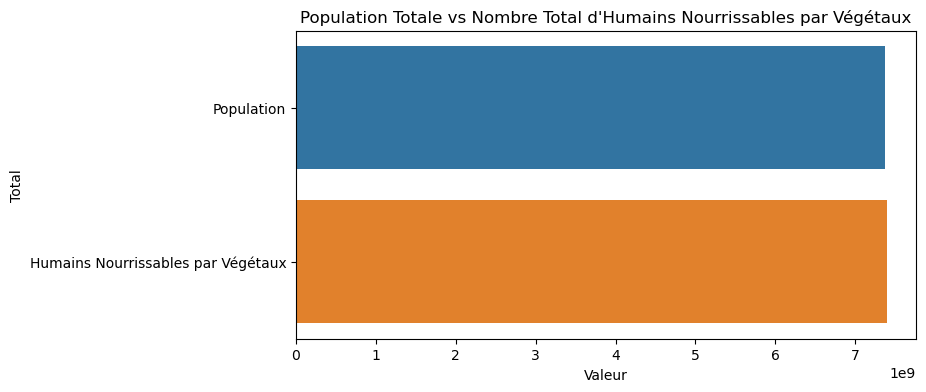

In [43]:
# Calculer la somme totale de la population et du nombre d'humains nourrissables par les végétaux
total_population = grouped2['Population'].sum()
total_humains_nourissable_vegetaux = grouped2['humains_nourissable_vegetaux'].sum()
# Créer un DataFrame avec ces informations
data = pd.DataFrame({'Total': ['Population', 'Humains Nourrissables par Végétaux'], 'Valeur': [total_population, total_humains_nourissable_vegetaux]})
# Créer un graphique à barres horizontales
plt.figure(figsize=(8, 4))
sns.barplot(x='Valeur', y='Total', data=data)
plt.title('Population Totale vs Nombre Total d\'Humains Nourrissables par Végétaux')
plt.show()

<div style=“border: 1px solid RGB(0,150,250);” > <h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">Par curiosité, je regarde la France</h4> </div>

In [44]:
# Par curiosité, je regarde la France
lignes = grouped2[grouped2['Zone'] == 'France']
# Affichez les lignes sélectionnées
display(lignes)
# On peut nourrir 95 millions de personnes pour 65 millions d'habitants environ
print(f"On peut nourrir {lignes['humains_nourissable_vegetaux'].values[0]:.2f} personnes avec des végétaux pour {lignes['Population'].values[0]:.2f} habitants en {lignes['Zone'].values[0]}.")

,Zone,Population,dispo_kcal,humains_nourissable_vegetaux
53,France,64990511.00,149413184789.00,63310671.52


On peut nourrir 63310671.52 personnes avec des végétaux pour 64990511.00 habitants en France.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

La disponibilité intérieure totale est de 9848994.0
La part de Aliments pour animaux est de 0.13242418464261427
La part de Pertes est de 0.04606541541196999
La part de Alimentation humaine est de 0.4951021393657058
La part de Autre alimentation est de 0.9999999316080669


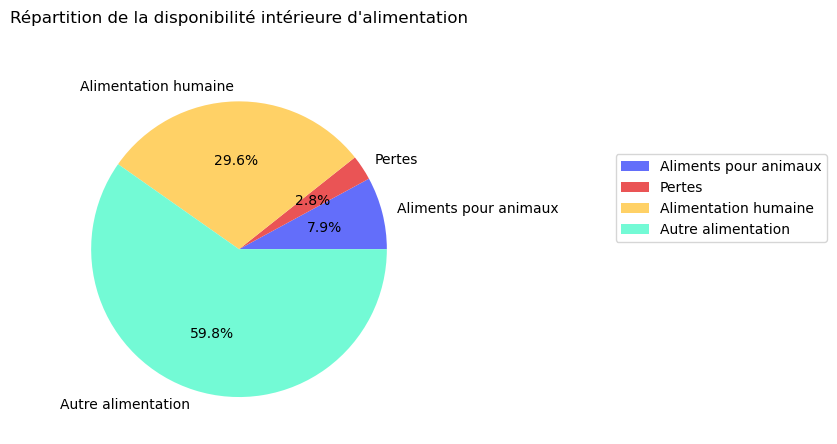

In [45]:
# Calcul de la disponibilité totale
dispo_int_total = dispoalim['Disponibilité intérieure'].sum()
print(f"La disponibilité intérieure totale est de {dispo_int_total}")
# Boucle sur les colonnes et affiche la somme pour chaque colonne
labels = ['Aliments pour animaux', 'Pertes', 'Alimentation humaine', 'Autre alimentation']
data = []
for label in labels:
    if label == 'Alimentation humaine':
        dispo_part = dispoalim['Nourriture'].sum() / dispo_int_total
    elif label == 'Autre alimentation':
        dispo_part = (dispo_int_total - sum(data)) / dispo_int_total
    else:
        dispo_part = dispoalim[label].sum() / dispo_int_total
    data.append(dispo_part)
    print(f"La part de {label} est de {dispo_part}")
# Graphique
colors = ['#636EFA', '#EA5455', '#FFD166', '#73FAD5']  # personnalisation des couleurs
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=colors)
plt.legend(loc="lower left", bbox_to_anchor=(1.5, 0.5))  # personnalisation de la position de la légende
plt.title('Répartition de la disponibilité intérieure d\'alimentation', loc='center', pad=30)  # personnalisation du titre
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [46]:
#Création d'une liste avec toutes les variables 
# Liste des céréales
cereales = ['Blé', 'Maïs', 'Seigle', 'Orge', 'Avoine', 'Riz (Eq Blanchi)', 'Sarrasin', 'Céréales, Autres', 'Millet', 'Sorgho']

In [47]:
# Filtrez 'dispoalim' pour ne garder que les lignes où 'Produit' est dans la liste 'cereales'
dispocereale = dispoalim[dispoalim['Produit'].isin(cereales)].copy()
# Groupez 'dispocereale' par 'Zone' et sommez les valeurs pour les colonnes numériques pertinentes
grouped_cereale = dispocereale.groupby('Zone')[['Nourriture', 'Aliments pour animaux']].sum().reset_index()
# Renommez les colonnes pour une meilleure clarté
grouped_cereale["Alim_humaine"] = grouped_cereale["Nourriture"]
grouped_cereale["Alim_animale"] = grouped_cereale["Aliments pour animaux"]
# Calculez les totaux pour les proportions
total_alim = grouped_cereale[["Alim_humaine", "Alim_animale"]].sum().sum()
proportion_humaine = grouped_cereale["Alim_humaine"].sum() / total_alim * 100
proportion_animale = grouped_cereale["Alim_animale"].sum() / total_alim * 100

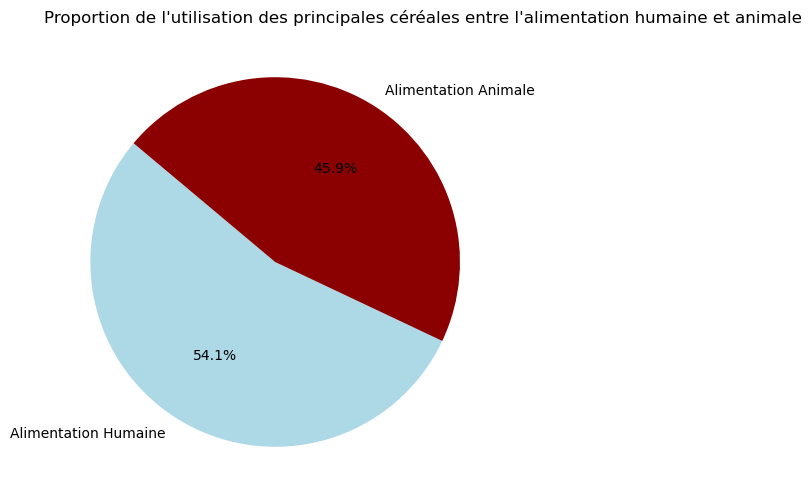

In [48]:
# Créez les labels et valeurs pour le graphique
labels = ['Alimentation Humaine', 'Alimentation Animale']
values = [proportion_humaine, proportion_animale]

# Créez le graphique en camembert
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=["lightblue", "darkred"], startangle=140)
plt.title("Proportion de l'utilisation des principales céréales entre l'alimentation humaine et animale", loc="left")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [49]:
# Création de la colonne 'ProportionSousNutrition'
popsousnutri2017['ProportionSousNutrition'] = (popsousnutri2017['sous_nutrition'] / popsousnutri2017['Population']) * 100
display (popsousnutri2017)

,Zone,Année_x,sous_nutrition,Année_y,Population,ProportionSousNutrition
0,Afghanistan,2016-2018,10500000.00,2017,36296113,28.93
1,Afrique du Sud,2016-2018,3100000.00,2017,57009756,5.44
2,Albanie,2016-2018,100000.00,2017,2884169,3.47
3,Algérie,2016-2018,1300000.00,2017,41389189,3.14
4,Angola,2016-2018,5800000.00,2017,29816766,19.45
...,...,...,...,...,...,...
231,Uruguay,NaN,NaN,2017,3436641,NaN
232,Vanuatu,NaN,NaN,2017,285510,NaN
233,Yémen,NaN,NaN,2017,27834819,NaN
234,Zambie,NaN,NaN,2017,16853599,NaN


In [50]:
# Groupement des données par 'Zone' et calcul de la somme de 'PourcentageSousNutrition'
popsousnutri2017_grouped = popsousnutri2017.groupby('Zone')['sous_nutrition'].sum().reset_index()
# Renommage de la colonne 'PourcentageSousNutrition' en 'ProportionSousNutrition'
popsousnutri2017_grouped.rename(columns={'sous_nutrition': 'ProportionSousNutrition'}, inplace=True)
# Affichage du nouveau DataFrame
display(popsousnutri2017_grouped)

,Zone,ProportionSousNutrition
0,Afghanistan,10500000.00
1,Afrique du Sud,3100000.00
2,Albanie,100000.00
3,Algérie,1300000.00
4,Allemagne,0.00
...,...,...
231,Îles Salomon,0.00
232,Îles Turques-et-Caïques,0.00
233,Îles Vierges américaines,0.00
234,Îles Vierges britanniques,0.00


In [51]:
#affichage après trie des 10 pires pays
# Tri du DataFrame par 'ProportionSousNutrition' en ordre décroissant
popsousnutri2017_sorted = popsousnutri2017_grouped.sort_values('ProportionSousNutrition', ascending=False)
# Sélection des 10 premières lignes
top10_pires_pays = popsousnutri2017_sorted.head(10)
# Affichage du résultat
display(top10_pires_pays)

,Zone,ProportionSousNutrition
84,Inde,190100000.00
141,Pakistan,24800000.00
85,Indonésie,23600000.00
132,Nigéria,22800000.00
19,Bangladesh,21500000.00
222,Éthiopie,21100000.00
148,Philippines,15700000.00
166,République-Unie de Tanzanie,13400000.00
165,République populaire démocratique de Corée,12000000.00
96,Kenya,11900000.00


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [52]:
#calcul du total de l'aide alimentaire par pays
# Groupement des données par 'Zone' et calcul de la somme de 'Valeur'
aidealim2_grouped = aidealim2.groupby('Zone')['Valeur'].sum().reset_index()
# Renommage de la colonne 'Valeur' en 'TotalAideAlimentaire'
aidealim2_grouped.rename(columns={'Valeur': 'TotalAideAlimentaire'}, inplace=True)
# Affichage du nouveau DataFrame
display(aidealim2_grouped.head())

,Zone,TotalAideAlimentaire
0,Afghanistan,185452000000
1,Algérie,81114000000
2,Angola,5014000000
3,Bangladesh,348188000000
4,Bhoutan,2666000000


In [53]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
# Tri du DataFrame par 'TotalAideAlimentaire' en ordre décroissant
aidealim2_sorted = aidealim2_grouped.sort_values('TotalAideAlimentaire', ascending=False)
# Sélection des 10 premières lignes
top10_countries = aidealim2_sorted.head(10)
# Affichage du résultat
display(top10_countries)

,Zone,TotalAideAlimentaire
50,République arabe syrienne,1858943000000
75,Éthiopie,1381294000000
70,Yémen,1206484000000
61,Soudan du Sud,695248000000
60,Soudan,669784000000
30,Kenya,552836000000
3,Bangladesh,348188000000
59,Somalie,292678000000
53,République démocratique du Congo,288502000000
43,Niger,276344000000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [54]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
# Création d'un nouveau DataFrame avec la zone, l'année et l'aide alimentaire
paysaidealim = aidealim2[['Zone', 'Année', 'Valeur']]
# Groupement des données par 'Zone' et 'Année', et calcul de la somme de 'Valeur'
paysaidealimgroupe = paysaidealim.groupby(['Zone', 'Année'])['Valeur'].sum().reset_index()
# Renommage de la colonne 'Valeur' en 'TotalAideAlimentaire'
paysaidealimgroupe.rename(columns={'Valeur': 'TotalAideAlimentaire'}, inplace=True)
# Affichage du nouveau DataFrame
display(paysaidealimgroupe.head())

,Zone,Année,TotalAideAlimentaire
0,Afghanistan,2013,128238000000
1,Afghanistan,2014,57214000000
2,Algérie,2013,35234000000
3,Algérie,2014,18980000000
4,Algérie,2015,17424000000


In [55]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire  
# Création d'un DataFrame avec la somme totale de l'aide alimentaire par pays
total_aide_par_pays = paysaidealimgroupe.groupby('Zone')['TotalAideAlimentaire'].sum().reset_index()
# Trouver les 5 pays qui ont reçu le plus d'aide alimentaire
top_5_pays = total_aide_par_pays.nlargest(5, 'TotalAideAlimentaire')
display (top_5_pays)
# Création d'une liste contenant les noms de ces pays
liste_top_5_pays = top_5_pays['Zone'].tolist()
# Affichage de la liste
display(liste_top_5_pays)

,Zone,TotalAideAlimentaire
50,République arabe syrienne,1858943000000
75,Éthiopie,1381294000000
70,Yémen,1206484000000
61,Soudan du Sud,695248000000
60,Soudan,669784000000


['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']

In [56]:
#On filtre sur le dataframe avec notre liste
# Filtrer le DataFrame total_aide_par_pays en utilisant la liste des pays
total_aide_top_5_pays = total_aide_par_pays[total_aide_par_pays['Zone'].isin(liste_top_5_pays)]
# Afficher le DataFrame filtré
display(total_aide_top_5_pays)

,Zone,TotalAideAlimentaire
50,République arabe syrienne,1858943000000
60,Soudan,669784000000
61,Soudan du Sud,695248000000
70,Yémen,1206484000000
75,Éthiopie,1381294000000


In [57]:
# Affichage des pays avec l'aide alimentaire par année
# Filtrer le DataFrame initial avec la liste des pays
les_5_pays = paysaidealimgroupe[paysaidealimgroupe['Zone'].isin(liste_top_5_pays)]
# Afficher le résultat
display(les_5_pays)

,Zone,Année,TotalAideAlimentaire
157,République arabe syrienne,2013,563566000000
158,République arabe syrienne,2014,651870000000
159,République arabe syrienne,2015,524949000000
160,République arabe syrienne,2016,118558000000
189,Soudan,2013,330230000000
190,Soudan,2014,321904000000
191,Soudan,2015,17650000000
192,Soudan du Sud,2013,196330000000
193,Soudan du Sud,2014,450610000000
194,Soudan du Sud,2015,48308000000


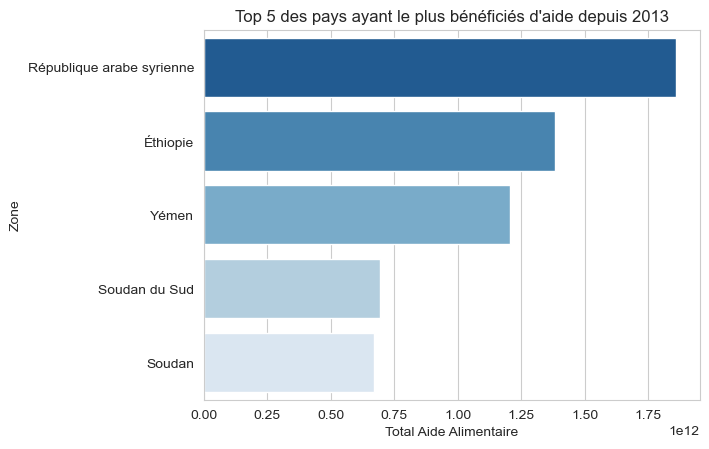

In [58]:
# Trier les données et graphique
total_aide_top_5_pays = total_aide_top_5_pays.sort_values('TotalAideAlimentaire', ascending=False)
sns.set_style("whitegrid")
barplot = sns.barplot(x=total_aide_top_5_pays['TotalAideAlimentaire'], y = total_aide_top_5_pays['Zone'], palette="Blues_r")
barplot.set_title('Top 5 des pays ayant le plus bénéficiés d\'aide depuis 2013')
barplot.set(xlabel='Total Aide Alimentaire', ylabel='Zone')
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [59]:
#Calcul de la disponibilité en kcal par personne par jour par pays en 2017
# Grouper par 'Zone', puis sommer "Disponibilité alimentaire (Kcal/personne/jour)"
dispoalimdispokcal = dispoalim2.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().reset_index()
# Afficher le résultat
display(dispoalimdispokcal.head())

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.00
1,Afrique du Sud,3020.00
2,Albanie,3188.00
3,Algérie,3293.00
4,Allemagne,3503.00


In [60]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
# Trouver les 10 pays qui ont le moins de disponibilité alimentaire par personne
piredispo_10_pays = dispoalimdispokcal.nsmallest(10, 'Disponibilité alimentaire (Kcal/personne/jour)')
# Afficher le résultat
display(piredispo_10_pays)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,1879.00
166,Zambie,1924.00
91,Madagascar,2056.00
0,Afghanistan,2087.00
65,Haïti,2089.00
133,République populaire démocratique de Corée,2093.00
151,Tchad,2109.00
167,Zimbabwe,2113.00
114,Ouganda,2126.00
154,Timor-Leste,2129.00


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [61]:
# Trouver les 10 pays qui ont le moins de disponibilité alimentaire par personne
meilleurdispo_10_pays = dispoalimdispokcal.nlargest(10, 'Disponibilité alimentaire (Kcal/personne/jour)')
# Afficher le résultat
display(meilleurdispo_10_pays)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.00
16,Belgique,3737.00
159,Turquie,3708.00
171,États-Unis d'Amérique,3682.00
74,Israël,3610.00
72,Irlande,3602.00
75,Italie,3578.00
89,Luxembourg,3540.00
168,Égypte,3518.00
4,Allemagne,3503.00


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [62]:
#création d'un dataframe avec uniquement la Thaïlande 
# on as déja popsousnutri2017 avec la sous nutri et la population en 2017, on vas donc réutiliser ces info
# Filtrer les données pour la Thaïlande et le Manioc
dispoalim2_thailand_manioc = dispoalim2[(dispoalim2['Zone'] == 'Thaïlande') & (dispoalim2['Produit'] == 'Manioc')]
popsousnutri2017_thailand = popsousnutri2017[popsousnutri2017['Zone'] == 'Thaïlande']

In [63]:
#Calcul de la sous nutrition en Thaïlande
# Fusionner les deux DataFrames
df_thailand_manioc = pd.merge(dispoalim2_thailand_manioc, popsousnutri2017_thailand, on='Zone')
# Afficher le résultat
display(df_thailand_manioc)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Pertes,Production,Semences,Traitement,Variation de stock,Année_x,sous_nutrition,Année_y,Population,ProportionSousNutrition
0,Thaïlande,Manioc,vegetale,1800000000.00,2081000000.00,40.00,13.00,0.05,0.14,6264000000.00,...,1511000000.00,30228000000.00,0.00,0.00,0.00,2016-2018,6200000.00,2017,69209810,8.96


In [64]:
# Calculer la proportion exportée en fonction de la production
df_thailand_manioc['Proportion_Exportée'] = df_thailand_manioc['Exportations - Quantité'] / df_thailand_manioc['Production']
df_thailand_manioc = df_thailand_manioc[['Zone', 'Produit', 'Production', 'Exportations - Quantité', 'Proportion_Exportée', 'sous_nutrition', 'Population', 'ProportionSousNutrition']]
# Afficher le DataFrame résultant
display(df_thailand_manioc)
# On souligne que la Thaïlande exporte 83% de son Manioc alors que 9% de la pop sont en sous nutrition

,Zone,Produit,Production,Exportations - Quantité,Proportion_Exportée,sous_nutrition,Population,ProportionSousNutrition
0,Thaïlande,Manioc,30228000000.00,25214000000.00,0.83,6200000.00,69209810,8.96


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires, impact des aides alimentaires</h2>
</div>

In [65]:
###Filtrer les données pour les pays d’intérêt
##La première étape consiste à filtrer les dataframes pour ne garder que les pays qui nous intéressent.
#Nous avons une liste de cinq pays pour lesquels nous voulons analyser l’évolution de l’aide alimentaire et de la sous-nutrition
# Liste des pays à analyser
pays = ['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']
# Filtrer les dataframes pour ne garder que les pays d'intérêt
les_5_pays = les_5_pays[les_5_pays['Zone'].isin(pays)]
sousnutri2 = sousnutri2[sousnutri2['Zone'].isin(pays)]
display (sousnutri2)

,Zone,Année,sous_nutrition
366,Éthiopie,2012-2014,26200000.00
367,Éthiopie,2013-2015,24300000.00
368,Éthiopie,2014-2016,21700000.00
369,Éthiopie,2015-2017,21300000.00
370,Éthiopie,2016-2018,21100000.00
371,Éthiopie,2017-2019,21500000.00
1056,Soudan,2012-2014,5900000.00
1057,Soudan,2013-2015,5100000.00
1058,Soudan,2014-2016,4400000.00
1059,Soudan,2015-2017,4800000.00


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Seul 2 pays des 5 pays les plus aidé alimentairement ont de la sous nutrition, analysons les évolutions entre les aides, et la sous nutrition</h2>
</div>

In [66]:
# Convertir les tranches d'années en une seule année
sousnutri2['Année'] = sousnutri2['Année'].apply(lambda x: int(sum(map(int, str(x).split('-'))) / 2) if '-' in str(x) else x)
display (sousnutri2)

,Zone,Année,sous_nutrition
366,Éthiopie,2013,26200000.00
367,Éthiopie,2014,24300000.00
368,Éthiopie,2015,21700000.00
369,Éthiopie,2016,21300000.00
370,Éthiopie,2017,21100000.00
371,Éthiopie,2018,21500000.00
1056,Soudan,2013,5900000.00
1057,Soudan,2014,5100000.00
1058,Soudan,2015,4400000.00
1059,Soudan,2016,4800000.00


In [67]:
# Liste des pays à analyser
paysfinal = ['Éthiopie', 'Soudan']
# Filtrer les dataframes pour ne garder que les pays d'intérêt
les_5_pays = les_5_pays[les_5_pays['Zone'].isin(paysfinal)]
sousnutri2 = sousnutri2[sousnutri2['Zone'].isin(paysfinal)]
display (sousnutri2)

,Zone,Année,sous_nutrition
366,Éthiopie,2013,26200000.00
367,Éthiopie,2014,24300000.00
368,Éthiopie,2015,21700000.00
369,Éthiopie,2016,21300000.00
370,Éthiopie,2017,21100000.00
371,Éthiopie,2018,21500000.00
1056,Soudan,2013,5900000.00
1057,Soudan,2014,5100000.00
1058,Soudan,2015,4400000.00
1059,Soudan,2016,4800000.00


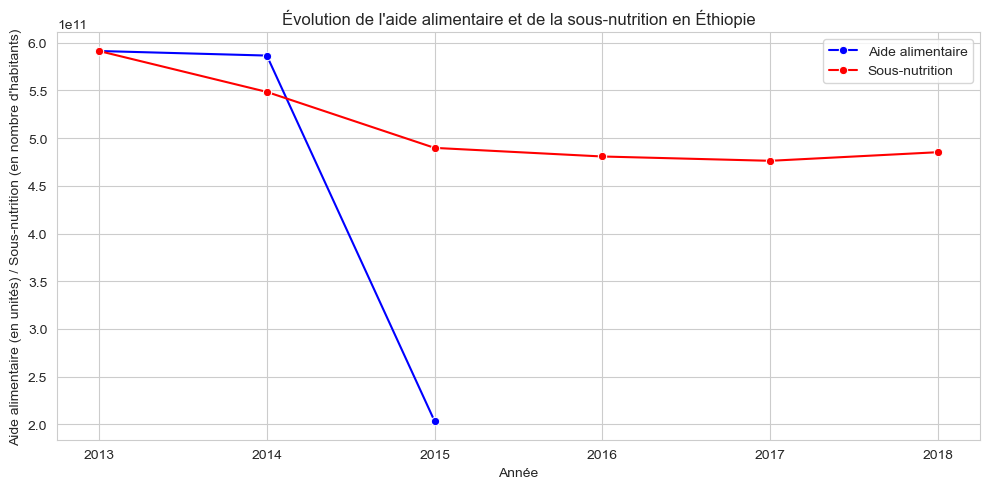

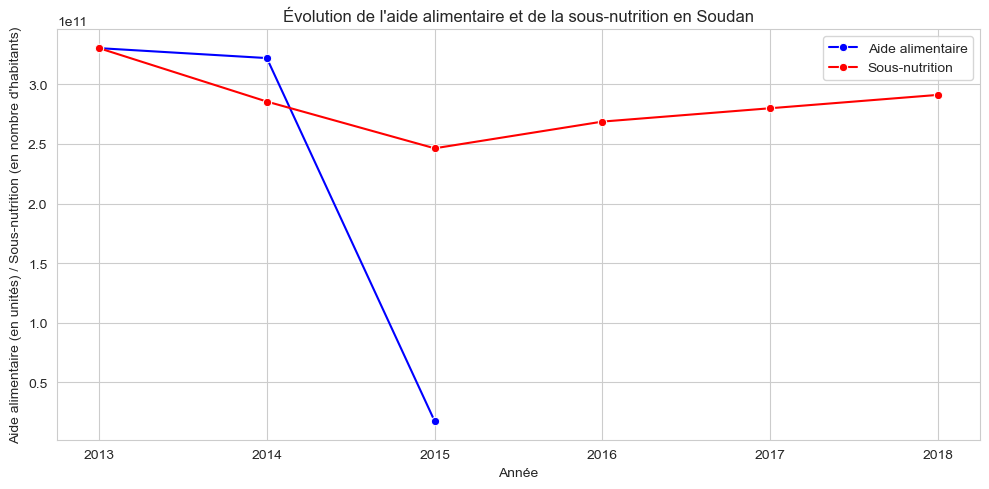

In [68]:
# Fusion des deux DataFrames sur la colonne 'Zone' et 'Année' avec une fusion externe
merged_df = pd.merge(sousnutri2, les_5_pays, on=['Zone', 'Année'], how='outer', suffixes=('_sousnutrition', '_aidealim'))

# Création des graphiques par pays
for pays in ['Éthiopie', 'Soudan']:
    plt.figure(figsize=(10, 5))
    
    # Filtrage des données pour le pays en cours
    data_pays = merged_df[merged_df['Zone'] == pays]
    
    # Détermination de l'échelle pour la sous-nutrition en se basant sur l'aide alimentaire
    max_aidealim = data_pays['TotalAideAlimentaire'].max()
    max_sousnutrition = data_pays['sous_nutrition'].max()
    sousnutrition_scale = max_aidealim / max_sousnutrition if max_sousnutrition != 0 else 1
    
    # Représentation de l'aide alimentaire
    sns.lineplot(data=data_pays, x='Année', y='TotalAideAlimentaire', label='Aide alimentaire', marker='o', color='blue')
    
    # Représentation de la sous-nutrition (avec échelle ajustée)
    sns.lineplot(data=data_pays, x='Année', y=data_pays['sous_nutrition'] * sousnutrition_scale, label='Sous-nutrition', marker='o', color='red')
    
    # Titres et labels
    plt.title(f'Évolution de l\'aide alimentaire et de la sous-nutrition en {pays}')
    plt.xlabel('Année')
    plt.ylabel('Aide alimentaire (en unités) / Sous-nutrition (en nombre d\'habitants)')
    
    # Légende et affichage
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


L’analyse des données sur une période d’échantillonnage de trois ans (2013-2015) révèle une corrélation notable entre l’aide alimentaire et la sous-nutrition en Éthiopie et au Soudan.

Il est évident qu’une augmentation de l’aide alimentaire contribue efficacement à la réduction de la sous-nutrition. Inversement, une diminution de cette aide entraîne une augmentation du volume de la sous-nutrition. C’est particulièrement frappant dans le cas du Soudan, où la sous-nutrition a même commencé à augmenter à nouveau.

Ces résultats soulignent l’importance cruciale de l’aide alimentaire pour lutter contre la sous-nutrition dans ces pays.